# Python for Finance - Part 2

&nbsp;

Part 2 of the workshop will teach you how to create subplots with matplotlib to visualize daily, monthly and annual returns and how to perform portfolio optimization using monte carlo simulation

**At the end of this sessions, you will be able to**

- create subplots with matplotlib
- plot data to specific subplots
- perform portfolio optimization using monte carlo simulation
- visualize the results from a monte carlo simulation

<b>What to do when getting stuck</b>:
    <ol>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
    </ol>

&nbsp;


### Task 1: Netflix returns

We will need the netflix stock price data and the daily, monthly and annual returns that you calculated in the first part of the workshop to create the chart later on.

Copy-paste your code to download the Netflix stock price data and calculate the daily, monthly and annual returns.

<details>
<summary><b>Click here to reveal solution code</b></summary>

```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

nflx = yf.download('NFLX', start='2009-01-01')

nflx['daily_ret'] = nflx['Adj Close'].pct_change()
nflx['daily_ret_1'] = nflx['daily_ret'] + 1
nflx['monthly_ret'] = nflx.resample('1M')['daily_ret_1'].transform('prod') - 1
nflx['annual_ret'] = nflx.resample('1A')['daily_ret_1'].transform('prod') - 1
```
</details>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

nflx = yf.download('NFLX', start='2009-01-01')

nflx['daily_ret'] = nflx['Adj Close'].pct_change()
nflx['daily_ret_1'] = nflx['daily_ret'] + 1
nflx['monthly_ret'] = nflx.resample('1M')['daily_ret_1'].transform('prod') - 1
nflx['annual_ret'] = nflx.resample('1A')['daily_ret_1'].transform('prod') - 1

[*********************100%***********************]  1 of 1 completed


&nbsp;

&nbsp;


## The object-oriented approach to plotting with matplotlib

Now that we have calculated the returns for each day and month, we can plot them in separate subplots inside a single chart.

Before we get into how to write the code to do that, let us first look at the two different approaches how you can create plots with matplotlib.

#### Using functions and the matplotlib objects

The first approach is to use the functions from the matplotlib library to create and customize a plot. This is what we did when we used the `plt.plot()` function to create a line or area plot, and the `plt.title()` or `plt.grid()` functions to set a title or grid. Remember that we imported the `matplotlib.pyplot` library under the alias `plt`. So when we call `plt.plot()` we are calling a function from the matplotlib library.

Below is an example of using the functions from the pyplot module.

[*********************100%***********************]  1 of 1 completed


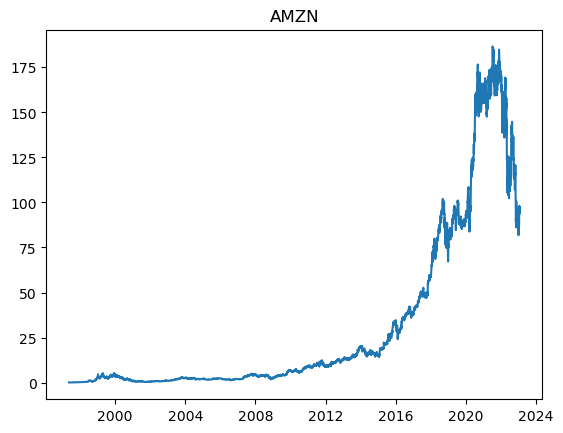

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

amzn = yf.download('AMZN')

# using functions from pyplot/plt
plt.plot(amzn.index, amzn['Adj Close']) # fig and axes object created in the background
plt.title('AMZN')

plt.show()


This approach obscures the fact, that behind the scenes, you are creating a hierarchy of objects. To understand this better, we need to have a look at the different elements a chart in matplotlib consists of.

At the highest level we have the <span style="color:red"><b>figure</b></span> object, which is the general chart region, wherein a single or several plots can be created. The different plots within a figure are called <span style="color:green"><b>axes</b></span>. Within the <span style="color:green"><b>axes</b></span> objects, we have all the smaller objects like the <span style="color:blue"><b>title</b></span> , <span style="color:blue"><b>ticks</b></span> , <span style="color:blue"><b>lines</b></span> , <span style="color:blue"><b>legend</b></span>  etc.

It is a bit confusion that matplotlib calls the plots within a <span style="color:red"><b>figure</b></span> <span style="color:green"><b>axes</b></span>. An <span style="color:green"><b>axes</b></span> does thus not refer to the axis of a plot, but the actual plot itself. 

You can see below that a <span style="color:red"><b>figure</b></span> can consist of several plots or <span style="color:green"><b>axes</b></span> and that each <span style="color:green"><b>axes</b></span> object consists of smaller objects such as <span style="color:blue"><b>titles</b></span> and <span style="color:blue"><b>axis</b></span> etc. The <span style="color:green"><b>axes</b></span> objects are enclosed within the <span style="color:red"><b>figure</b></span> object and the <span style="color:blue"><b>axis</b></span> and <span style="color:blue"><b>title</b></span> objects are enclosed within the <span style="color:green"><b>axes</b></span> object.

<img src="https://www.dropbox.com/s/oaxsc7261jxsg4m/mpl_figure.png?raw=1">

#### Using methods at the object level

This brings us to the second approach of creating plots with matplotlib by working with the chart objects and applying methods to these objects.

See the example below to compare how you to create a simple line plot both ways using the plt functions and the ax methods.

#### Using ax object methods

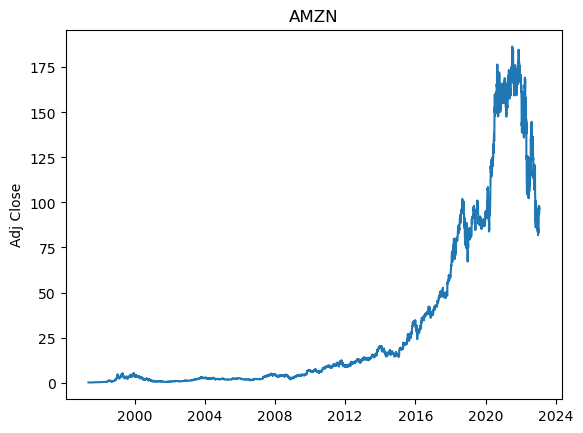

In [3]:
fig, ax = plt.subplots() # returning fig and axes object to us

ax.plot(amzn.index, amzn['Adj Close'])
ax.set_title('AMZN')
ax.set_ylabel('Adj Close')

plt.show()

##### Line 1: Creating the figure and axes object

We first create a figure and an axes object with `fig, ax = plt.subplots()`. The axes object is the actual plot that you can see. The figure object is the region within which this plot is being displayed, which is not directly visible.

##### Line 3: Adding a line plot

With `ax.plot(amzn['Adj Close'])` we call the plot() method of the ax object to add a line plot of the Adj Close column of the amzn dataframe. The important point to understand about this step is that the line is drawn at the level of the axes object and not the figure.

##### Line 4-5: Adding a title and yaxis label

All further customization of the axes are done on the level of the axes object itself. We use `.set_title('AMZN')` and `.set_ylabel('Adj Close')` to set a title and a ylabel.

### Task 2: Using an axes object to create a line plot

1. Create a figure and axes object using `plt.subplots()`
2. Plot the daily return rates from the Netflix stock dataset using the ax object
3. Add as a title 'NLFX' 
4. Add as a y-axis label 'Daily Return rate'.

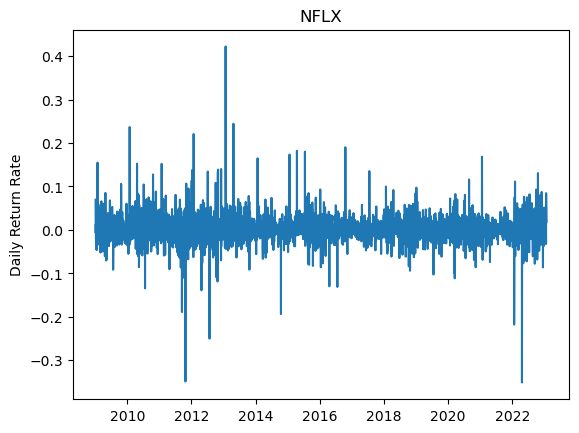

In [4]:
fig, ax = plt.subplots()

ax.plot(nflx['daily_ret'])
ax.set_title('NFLX')
ax.set_ylabel('Daily Return Rate')

plt.show()

&nbsp;

## Creating subplots with plt.subplots()

&nbsp;

We can use the `plt.subplots()` function to create a figure with several subplots. In the example below we create a figure with two subplots.

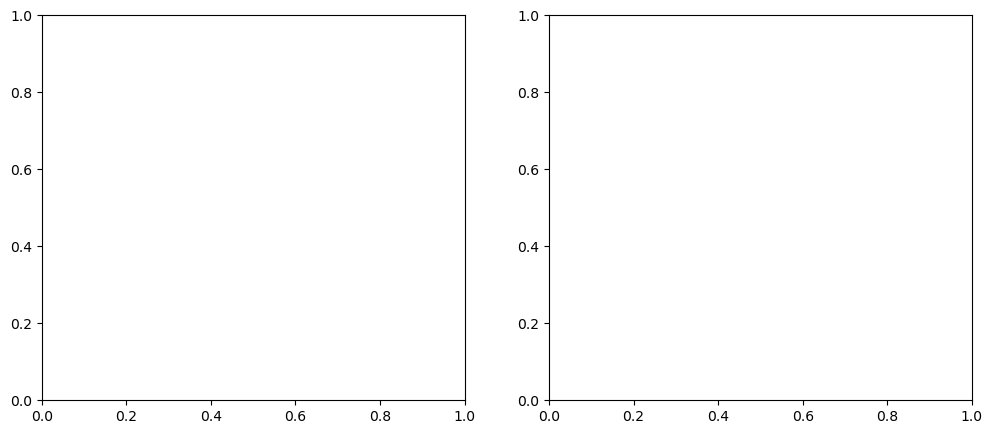

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

We set `nrows=1` and `ncols=2` to create two axes (plots) that are arranged next to each other in one row with two columns. The call to `plt.suplots()` will thus return three objects, the figure (overall chart region) and two axes (two subplots). We store the two axes under the name **ax1** and **ax2**. 

These two axes objects are returned as a numpy array with two values - one for the first and one for the second axes object. We can "unpack" the numpy array into the two separate axes objects by putting the parentheses around them as in `(ax1, ax2)`.

We set `figsize=(12,5)` to set the size of the figure to 12 inches wide and 5 inches high.


See below for an example of how to plot the daily and monthly returns from the Amazon stock dataset in the first and second subplot respectively.

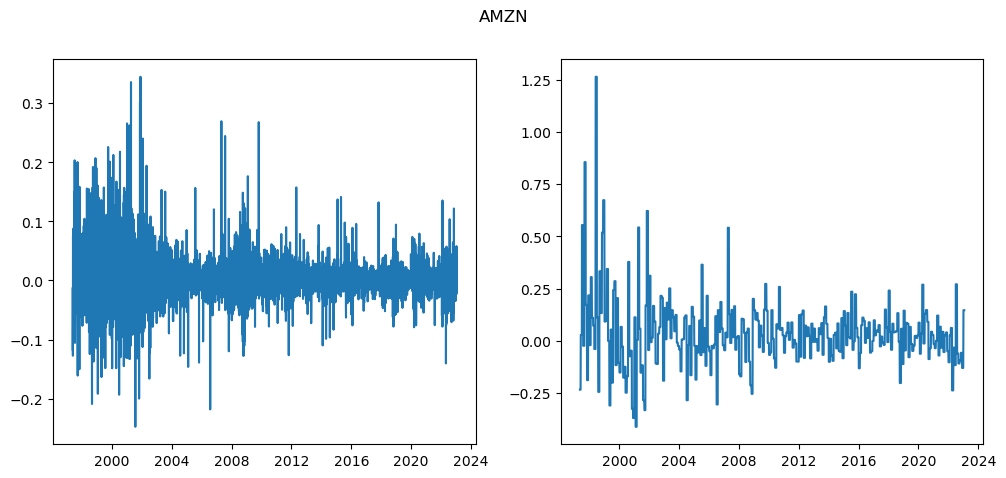

In [6]:
amzn['daily_ret'] = amzn['Adj Close'].pct_change()
amzn['daily_ret_1'] = amzn['daily_ret'] + 1
amzn['monthly_ret'] = amzn['daily_ret_1'].resample('1M').transform('prod') - 1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

fig.suptitle('AMZN')

ax1.plot(amzn['daily_ret'])
ax2.plot(amzn['monthly_ret'])

plt.show()

### Task 3: Creating subplots for Netflix returns

1. Create a figure with *three* subplots (axes) using the `plt.subplots()` function. 
    1. Arrange the three subplots *vertically*. 
    2. Set the figure size to 12*10 inches.
2. In the first subplot, plot the daily Netflix return rates. Use 'grey' as the color.
3. In the second subplot, plot the monthly Netflix return rates. Use 'black' as the color.
4. In the third subplot, plot the Adjusted price. Use 'red' as the color.
5. Add a y-axis labels to each subplot: 'Daily Return Rate', 'Monthly Return Rate', 'Adjusted'
6. Add 'Netflix' as a figure title.

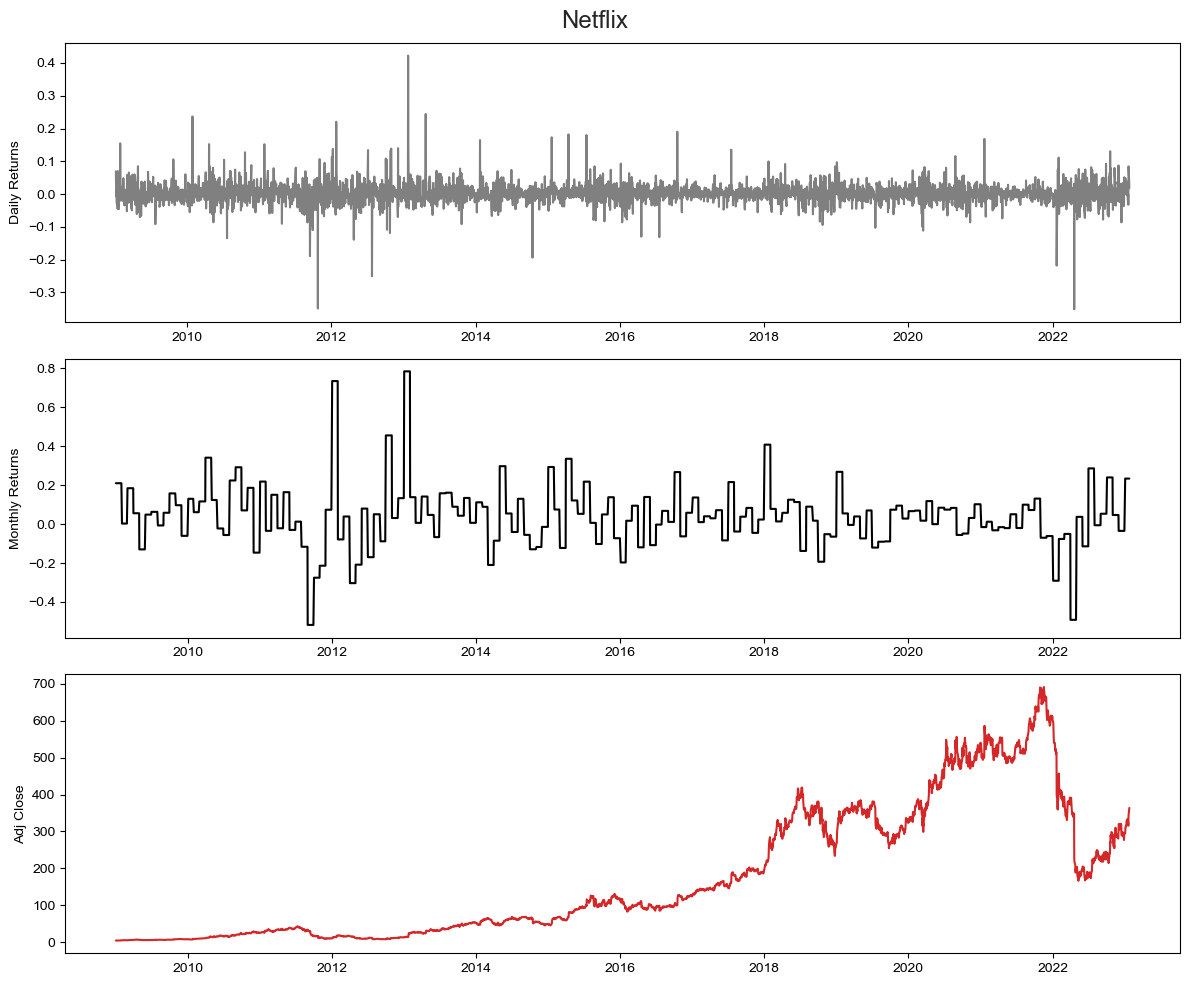

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

plt.style.use('seaborn-whitegrid')

fig.suptitle('Netflix', fontsize='xx-large')

ax1.plot(nflx['daily_ret'], color='grey')
ax1.set_ylabel('Daily Returns')

ax2.plot(nflx['monthly_ret'], color='black')
ax2.set_ylabel('Monthly Returns')

ax3.plot(nflx['Adj Close'], color='tab:red')
ax3.set_ylabel('Adj Close')

plt.tight_layout()
plt.show()

&nbsp;

&nbsp;


# Porfolio Optimization

Portfolio optimization is a popular tool in the finance and investment world to make decisions on how to best meet financial goals considering relative risks involved.

In this section you will learn how to apply portfolio optimization by running a **monte carlo simulation**, which uses randomly generated weights for each stock in your portfolio and then calculates the return and risk proportion for the portfolio using the **sharpe ratio**. 

The main logic of using monte carlo simulation for portfolio optimization is to repeat the random assignment of stock weights to simulate a large number of random portfolios in order to generate a distribution of returns, risks and the associated sharpe ratios. 

A visualization of the results of the simulation, can be used to get a better sense of the distribution of the returns, risks and sharpe ratios. Below you can see such a visualization for a portfolio consisting of Google, Facebook, Microsoft, Apple and Tesla stocks. Each dot in the scatter plot represents one simulated portfolio with randomly created weights. The horizontal position relates to the risk and the vertical position relates to the return of the portfolio. The sharpe ratio, that is, the return to risk ratio is color coded in the plot. The darker the dot, the higher the sharpe ratio. The portfolios with the lowest risk, highest return and the highest sharpe ratio are plotted in a distinct colour. Next to the scatter plot, there are three bar plots showing the weights for max sharpe, min risk and max return portfolio. 

The plot on the left is called the **efficient frontier** as the dots form a line along with the most efficient portfolios fall. This line consists of the portfolios with the maximum return for a given level of risk.

<img src="https://www.dropbox.com/s/nw5wvqecsl2c98z/efficient_frontier.png?raw=
          1">

### Steps involved in performing portfolio optimization using a monte carlo simulation

1. Download stock price data for multiple companies (the porfolio)
2. Calculate returns
3. Creating random weights for each stock in the portfolio
4. Calculate annualized return for the portfolio (all stocks combined)
5. Calculate the annualized risk for the portfolio (all stocks combined)
6. Calculate the sharpe ratio. $sharpe \ ratio = \frac{return}{risk}$
7. Repeat step 2.- 6. n times to create the distribution of returns, risks and sharpe ratios

## Calculating portfolio returns

In the first step we will download stock price data for multiple companies and calculate the daily returns.

#### NumPy

Numpy is an important library for data analysis in Python. It is very useful to create random values, draw from specific distributions, can be used for modelling and linear algebra and matrix algebra among other things. We will use it to calculate a random weight for each stock in our portfolio.

In [8]:
import numpy as np

#### Downloading the stock price data from yahoo finance

We will download the stock data from Apple, Tesla and Microsoft starting from 2011 to illustrate how we can calculate returns and portfolio returns.

In [9]:
tickers = ['AAPL', 'TSLA', 'MSFT']

stock_data = yf.download(tickers, start='2011-01-01', end='2021-12-31')

[*********************100%***********************]  3 of 3 completed


Since we downloaded data for more than one stock, pandas_datareader returns the data with hierarchical columns. At the highest level, we have the familar column names **Adj Close**, **Close**, **High**, **Low**, **Open**, **Volume**. Each of those measurements is split into three columns - one for each stock.

In [10]:
stock_data.head()

Adj Close                           Close         \
                                AAPL       MSFT      TSLA       AAPL   MSFT   
Date                                                                          
2011-01-03 00:00:00-05:00  10.033259  21.856337  1.774667  11.770357  27.98   
2011-01-04 00:00:00-05:00  10.085627  21.942265  1.778000  11.831786  28.09   
2011-01-05 00:00:00-05:00  10.168125  21.871956  1.788667  11.928571  28.00   
2011-01-06 00:00:00-05:00  10.159906  22.512486  1.858667  11.918929  28.82   
2011-01-07 00:00:00-05:00  10.232666  22.340643  1.882667  12.004286  28.60   

                                          High                         Low  \
                               TSLA       AAPL   MSFT      TSLA       AAPL   
Date                                                                         
2011-01-03 00:00:00-05:00  1.774667  11.795000  28.18  1.800000  11.601429   
2011-01-04 00:00:00-05:00  1.778000  11.875000  28.17  1.796667  11.719643   
2011-01-05 00:00:00-05:00  1.788667  11.940714  28.01  1.793333  11.767857   
2011-01-06 00:00:00-05:00  1.858667  11.973214  28.85  1.866667  11.889286   
2011-01-07 00:00:00-05:00  1.882667  12.012500  28.74  1.905333  11.853571   

                                                     Open             \
                                MSFT      TSLA       AAPL       MSFT   
Date                                                                   
2011-01-03 00:00:00-05:00  27.920000  1.726667  11.630000  28.049999   
2011-01-04 00:00:00-05:00  27.850000  1.734667  11.872857  27.940001   
2011-01-05 00:00:00-05:00  27.770000  1.746000  11.769643  27.900000   
2011-01-06 00:00:00-05:00  27.860001  1.787333  11.954286  28.040001   
2011-01-07 00:00:00-05:00  28.250000  1.860000  11.928214  28.639999   

                                        Volume                      
                               TSLA       AAPL      MSFT      TSLA  
Date                                                                
2011-01-03 00:00:00-05:00  1.789333  445138400  53443800  19245000  
2011-01-04 00:00:00-05:00  1.777333  309080800  54405600  17811000  
2011-01-05 00:00:00-05:00  1.765333  255519600  58998700  21700500  
2011-01-06 00:00:00-05:00  1.788667  300428800  88026300  30918000  
2011-01-07 00:00:00-05:00  1.866667  311931200  73762000  33718500

By selecting **Adj Close** from the top level we get the three columns for each stock! Compare the values from below and above to see which columns we extracted.

In [11]:
stock_data['Adj Close']

,AAPL,MSFT,TSLA
Date,,,
2011-01-03 00:00:00-05:00,10.033259,21.856337,1.774667
2011-01-04 00:00:00-05:00,10.085627,21.942265,1.778000
2011-01-05 00:00:00-05:00,10.168125,21.871956,1.788667
2011-01-06 00:00:00-05:00,10.159906,22.512486,1.858667
2011-01-07 00:00:00-05:00,10.232666,22.340643,1.882667
...,...,...,...
2021-12-23 00:00:00-05:00,175.262802,331.583008,355.666656
2021-12-27 00:00:00-05:00,179.289459,339.270966,364.646667
2021-12-28 00:00:00-05:00,178.255417,338.082123,362.823334


These are the only columns we need for the simulation, which is why we store them under a new name.

In [12]:
adj_close = stock_data['Adj Close']
adj_close

,AAPL,MSFT,TSLA
Date,,,
2011-01-03 00:00:00-05:00,10.033259,21.856337,1.774667
2011-01-04 00:00:00-05:00,10.085627,21.942265,1.778000
2011-01-05 00:00:00-05:00,10.168125,21.871956,1.788667
2011-01-06 00:00:00-05:00,10.159906,22.512486,1.858667
2011-01-07 00:00:00-05:00,10.232666,22.340643,1.882667
...,...,...,...
2021-12-23 00:00:00-05:00,175.262802,331.583008,355.666656
2021-12-27 00:00:00-05:00,179.289459,339.270966,364.646667
2021-12-28 00:00:00-05:00,178.255417,338.082123,362.823334


#### Calculating returns

We can now calculate the daily returns using the `.pct_change()` method.

In [13]:
stock_ret = adj_close.pct_change()

stock_ret.head()

,AAPL,MSFT,TSLA
Date,,,
2011-01-03 00:00:00-05:00,NaN,NaN,NaN
2011-01-04 00:00:00-05:00,0.005219,0.003931,0.001878
2011-01-05 00:00:00-05:00,0.008180,-0.003204,0.005999
2011-01-06 00:00:00-05:00,-0.000808,0.029285,0.039135
2011-01-07 00:00:00-05:00,0.007161,-0.007633,0.012912


#### Calculating mean daily portfolio return using weights

Based on the mean daily stock returns, we can calculate the return for our portfolio of stocks. One way to do this, is by calculating the average returns of all stocks in the dataset using the `.mean()` method. We have to set the axis parameter to 1 so that we average across the columns and not the rows!

This generates a new column with the average daily returns.

In [14]:
port_rets = stock_ret.mean(axis=1)
port_rets

Date
2011-01-03 00:00:00-05:00         NaN
2011-01-04 00:00:00-05:00    0.003676
2011-01-05 00:00:00-05:00    0.003658
2011-01-06 00:00:00-05:00    0.022537
2011-01-07 00:00:00-05:00    0.004147
                               ...   
2021-12-23 00:00:00-05:00    0.021911
2021-12-27 00:00:00-05:00    0.023803
2021-12-28 00:00:00-05:00   -0.004757
2021-12-29 00:00:00-05:00    0.000153
2021-12-30 00:00:00-05:00   -0.009621
Length: 2768, dtype: float64

This would be an equal weights portfolio - each stock contributes equally to the portfolio. We can also select specific weights for each stock in the portfolio. In order to do that, we will first create an array with weights, so that 50% of the portfolio will be Apple stocks, 25% will be Microsoft and another 25% will be Tesla stocks.

In [15]:
# creating array with portfolio weights
weights = np.array([0.50, 0.25, 0.25])
weights

array([0.5 , 0.25, 0.25])

Now we can calculate the portfolio returns using with the `.dot()` method which calculates the dot product of each row and the weights array. The dot product is calculated by multiplying the first weight with the return for Apple, the second weight with the return for Microsoft, the third weight with the return for Tesla and then adding up these values. This calculation will yield the return for a portfolio with the respective weights for each stock.

By applying the `.dot()` method as in the code below, we perform this calculation for each day.

In [16]:
# calculating the mean portfolio return
port_rets = stock_ret.dot(weights)
port_rets

Date
2011-01-03 00:00:00-05:00         NaN
2011-01-04 00:00:00-05:00    0.004062
2011-01-05 00:00:00-05:00    0.004789
2011-01-06 00:00:00-05:00    0.016701
2011-01-07 00:00:00-05:00    0.004901
                               ...   
2021-12-23 00:00:00-05:00    0.017345
2021-12-27 00:00:00-05:00    0.023596
2021-12-28 00:00:00-05:00   -0.005010
2021-12-29 00:00:00-05:00    0.000240
2021-12-30 00:00:00-05:00   -0.008860
Length: 2768, dtype: float64

<img src="https://www.dropbox.com/s/kyiofkpk9efgrqu/dot_product.png?raw=1" width=800px>

### Task 1 - Calculating portfolio returns

1. Download the stock data for Google, Meta and Amazon from 31 Dec 2018 until 31 Dec 2021 and store the data in the variable `stocks_data`.
2. Select the Adj Close columns and store the data in the variable `adj_close`.
3. Calculate the return rates and store the data in the variable `returns`.
4. Calculate the equal weighted portfolio returns by calculating the mean of the returns for each row and store the data in the variable `port_returns_mean`. There should be as many values in `port_returns_mean` as there are rows in `returns`.
5. Use the weights 0.5, 0.3 and 0.2 as a *numpy array* and store in the variable `weights`. Calculate the portfolio returns. You will have to use the `.dot()` method with the `weights` variable on the `returns` data. Store the result in `port_returns`.


In [17]:
tickers = ['GOOG', 'META', 'AMZN']

stocks_data = yf.download(tickers, start='2018-12-31')

adj_close = stocks_data['Adj Close']

returns = adj_close.pct_change()

port_returns_mean = returns.mean(axis=1)

weights = np.array([0.5, 0.3, 0.2])

port_returns = returns.dot(weights)

[*********************100%***********************]  3 of 3 completed


&nbsp;

&nbsp;

### Calculating total and annualized return

To calculate the total return, we can use the `.prod()` method of the return series.

We have to add 1 to all values, calculate the product using the `.prod()` method and then subtract 1 again. This yields the total return for the entire time period, which in this case is a 4215% or 43.15-fold increase in the value of the portfolio for 11 years, from 01-01-2011 to 31-12-2021.

In [18]:
# calculating the total return
total_ret = (port_rets+1).prod() - 1
print(total_ret)

42.465552264358685


The total return is calculated over 11 years. We can use it to calculate the return we would have gotten if we had invested a certain amount 11 years ago. If we had invested 25,000 10 years ago, we would now have a return of 1,078,874.

In [19]:
print((total_ret+1)*25000)

1086638.806608967


When simulation different portfolios, we need to use a value that reflects the average annual return. This is called the annualized return and can be calculated from a total return spanning several years using the below formula.

$annualized \ return = (total \ return + 1)^{\frac{1}{n \ years}} - 1$

We have to take the n-th square root corresponding to the number of years for which the total return was calculated. Since the data is for a period of 11 years (start 2011 - end 2021), we have to calculate the 11th square root of the total return + 1 and then subtract 1 again.

On average across the 11 years of data, the portfolio with our specific weights, has grown by roughly 40 % per year.

In [20]:
# calculating the annualized return
ann_ret = (total_ret+1)**(1/11) - 1
print(ann_ret)

0.40903665501281417


### Task 2 - Calculating total and annualized returns

1. Calculate the total return for `port_returns_mean` and `port_returns` and store in the variables `total_ret_mean` and `total_ret`. Which weights created better total returns?

2. Calculate the annualized return rate for the portfolio with your custom weights. Store the annualized return rate in the variable `ann_ret`.

In [21]:
total_ret_mean = (port_returns_mean + 1).prod() - 1

total_ret = (port_returns + 1).prod() - 1

ann_ret = (total_ret + 1)**(1/3) - 1

print(f'Custom weights used: {weights}')
print(f'total return for equal weights portfolio {total_ret_mean}')
print(f'total return for customs weights portfolio {total_ret}')
print(f'annualized return for the custom weights portfolio {ann_ret}')

Custom weights used: [0.5 0.3 0.2]
total return for equal weights portfolio 0.494478401685011
total return for customs weights portfolio 0.4932499483219679
annualized return for the custom weights portfolio 0.14299457593856468


&nbsp;

&nbsp;

## Risk of a portfolio and Sharpe Ratio

### Calculation portfolio risk using the standard deviation

We can model the risk of the portfolio using the **standard deviation of the portfolio returns**. In order to **annualize the portfolio standard deviation**, we have to multiply it with the square root of 250. This is because the standard deviation is the square root of the variance and the annualized variance and the annualized standard deviation have to be consistent.


In [22]:
port_sd = port_rets.std()*np.sqrt(250)
print(port_sd)

0.2668658867773014


### Sharpe Ratio - Risk adjusted returns

A popular way to estimate the expected return relative to its risk is the sharpe ratio, which combines the return rate and portfolio standard deviation together with the risk free rate. The risk free rate reflects the expected return for a risk-free investment. Treasury bonds are often used as an indicator for this. We will assume a risk-free rate of 1%.

$Sharpe \ Ratio = \frac{R_{p} - R_{f}}{\sigma_{p}}$

where: 

- $R_{p} = $  portfolio return rate
- $R_{f} = $ risk free rate
- $\sigma_{p} = $ portfolio standard deviation

Let us calculate the sharpe ratio for the portfolio. We have already calculated the annualized portfolio return and the portfolio standard deviation in the previous steps. We only need to create another variable for the risk free rate, before calculating the sharpe ratio.

In [23]:
rfr = 0.01

sharpe = (ann_ret - rfr) / port_sd

print(sharpe)

0.49835734924617087


The sharpe ratio tells us that for a portfolio with those weights, the annualized return (after adjustment for the risk-free rate) is 1.49 times higher than the annualized risk. Now it's your turn to calculate the sharpe ratio for your portfolio!

### Task 3 - Portfolio risk and Sharpe Ratio

Using the portfolio that you have created in the previous exercise:

1. Calculate the portfolio risk based on the standard deviation of the portfolio returns and **annualize the risk!**.
2. Calculate the sharpe ratio using a risk free rate of 1%.
3. How to you interpret the sharpe ratio?

In [24]:
port_sd = port_returns.std() * np.sqrt(250)

rfr = 0.01

sharpe = (ann_ret - rfr)/ port_sd
print(sharpe)
print(f'For my portfolio, the return after adjustment for the risk-free rate is {round(sharpe, 2)} times higher than the risk.')

0.4146851033475756
For my portfolio, the return after adjustment for the risk-free rate is 0.41 times higher than the risk.


&nbsp;

&nbsp;

## Portfolio optimization using a simulation

Let us review all the steps involved in calculating the sharpe ratio for a specific portfolio.

1. Downloading the stock price data
2. Calculating the returns for the individual stocks
3. Setting weights for each stock and calculating the portfolio return using the weights
4. Calculating the total and annualized return
5. Calculating the annualized portfolio standard deviation
6. Calculating the sharpe ratio

In [25]:
# setting tickers and risk free rate
tickers = ['GOOG', 'META', 'AMZN']
rfr = .01

# downloading the stock price data
stock_data = yf.download(tickers, start='2018-12-31', end='2021-12-31')

# selecting the adjusted close columns
adj_close = stock_data['Adj Close']

# calculating the stock returns
stock_ret = adj_close.pct_change()

# creating weights
weights = np.array([0.50, 0.3, 0.2])

# calculating portfolio returns
port_rets = stock_ret.dot(weights)

# calculating the total and annualized return
total_ret = (port_rets+1).prod() - 1
ann_ret = (total_ret+1)**(1/3) - 1

# calculating the portfolio risk
port_sd = port_rets.std() * np.sqrt(250)

# calculating the sharpe ratio
sharpe = (ann_ret - rfr) / port_sd

print(sharpe)


[*********************100%***********************]  3 of 3 completed
1.3298856683675184


A **monte carlo simulation** repeats this process a large number of times and uses randomly created weights each time. This way we can get a sense of the distribution of returns and risks. 

Below you can see the function that we have written for this.

The function takes five arguments:
1. `'tickers`: The stock tickers for the portfolio
2. `'rfr`: The risk-free-rate
3. `'start`: A start date
4. `end`: An end date
5. `'n_sims'`: The number of simulations to be run

Only the `'tickers'` argument has to be provided, since the remaining parameters have default values. The function will per default use the data from the past 5 years, simulate 1000 portfolios and uses a risk free rate of 1% to calculate the sharpe ratios.


The function returns four arrays for the:
- randomly created weights
- annualized standard deviations
- annualized returns
- sharpe ratios

Each of these arrays has 1000 elements or rows for the array containing the weights, since we ran 1000 simulations.

In [26]:
import datetime

def monte_carlo_sim(tickers, rfr=0.01, n_sims=1000, start=None, end=None):
    # create start date if non is provided
    if not start:
        start = datetime.datetime.today() - datetime.timedelta(365*5)
    
    # download stock price data
    stock_data = yf.download(tickers, start, end)
    adj_close = stock_data['Adj Close']
    stock_returns = adj_close.pct_change()
    
    # empty lists to store weights, annualized return and risks and sharpe ratios for each simulated portfolio
    port_wts = []
    port_ann_rets = [] 
    port_risks = []
    port_sharpe_rts = []

    # loop to generate all random weight portfolios
    for i in range(n_sims):
        # create random weights
        wts = np.random.uniform(size=len(tickers)) 
        wts = wts / sum(wts)
        
        # calculate portfolio returns, annualized return and risk and sharpe ratios
        port_rets = stock_returns.dot(wts)
        total_ret = (port_rets + 1).prod() - 1
        ann_ret = (total_ret + 1)**(1/(len(stock_returns)/252)) - 1
        port_sd = port_rets.std() * np.sqrt(250)
        sharpe = (ann_ret - rfr) / port_sd
    
        # add weights, annualized returns and risks and sharpe ratios to lists
        port_wts.append(wts)
        port_ann_rets.append(ann_ret)
        port_risks.append(port_sd)
        port_sharpe_rts.append(sharpe)
    
    return np.array(port_wts), np.array(port_risks), np.array(port_ann_rets), np.array(port_sharpe_rts)



We create a new list `tickers`for the stocks we want to include in the portfolio and pass the list to the `monte_carlo_sim` function. All other parameters use the default value.

In [27]:
tickers = ['AAPL', 'NFLX', 'GOOG', 'AMZN', 'META']

port_wts, port_risks, port_ann_rets, port_sharpe_rts = monte_carlo_sim(tickers, n_sims=3000, start='2011-01-01')

[*********************100%***********************]  5 of 5 completed


Let us confirm that we get the correct number of values

In [28]:
print(port_wts.shape)
print(port_risks.shape)
print(port_ann_rets.shape)
print(port_sharpe_rts.shape)

(3000, 5)
(3000,)
(3000,)
(3000,)


Let us print the values for the first portfolio that we simulated

In [29]:
port_i = 0
print(f'Portfolio {port_i+1}:')
print('='*19)
print('weights:')
for i, comp in enumerate(tickers):
    comp = '- '+comp
    print(f'{comp:>8} {port_wts[port_i][i]:9.2f}')
print(f'risk: {port_risks[port_i]:12.2f}')
print(f'return: {port_ann_rets[port_i]:10.2f}')
print(f'sharpe ratio: {port_sharpe_rts[port_i]:.2f}')

Portfolio 1:
weights:
  - AAPL      0.17
  - NFLX      0.25
  - GOOG      0.12
  - AMZN      0.39
  - META      0.08
risk:         0.28
return:       0.20
sharpe ratio: 0.69


### Visualizing the efficient frontier

As a first step, we can visualize the distribution of risk and return only with a scatter plot with the `plt.scatter()` function. We plot the portfolio risk on the x-axis and the portfolio returns on the y-axis.

As in the first example, the dots again create the distinct shape, the so-called efficient frontier, which represents the most efficient portfolios. Portfolios that lie on this frontier represent the portfolios with the highest return for a given level of risk or vice versa. Although we have only simulated a limited number of portfolios, we know that there are no possible portfolios outside the edge of the data cloud. As you increase the number of simulations the edge will become smoother.

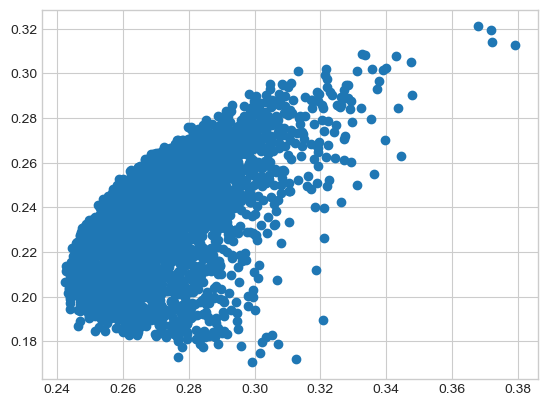

In [30]:
import matplotlib.pyplot as plt

plt.scatter(port_risks, port_ann_rets)

We pass the `port_sharpe_rts` array to the `c` parameter of the `plt.scatter()` function in order for the color of the dots to indicate the sharpe ratio.

The colors to be used for the dots can be changed with the `cmap` parameter. We use the Purple-Blue (PuBu) colormap.

With the `plt.colorbar()` function, we can display a colorbar next to the plot that shows the mapping of colors and values.

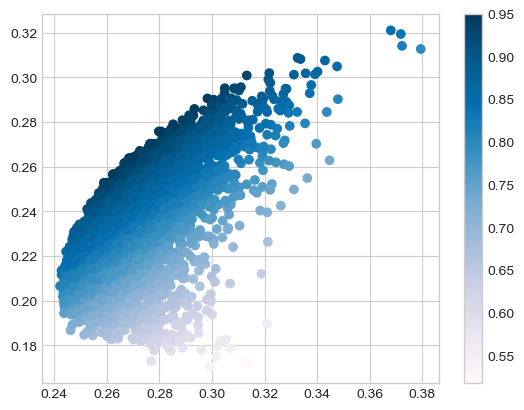

In [31]:
plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')

plt.colorbar()

### Task 4 - Plotting the efficient frontier

1. Use the `monte_carlo_sim` function to simulate 10000 portfolios for 4 stocks of your choice.
2. Plot the efficient frontier with a scatter plot and add a color bar for the sharpe ratio values.

[*********************100%***********************]  5 of 5 completed


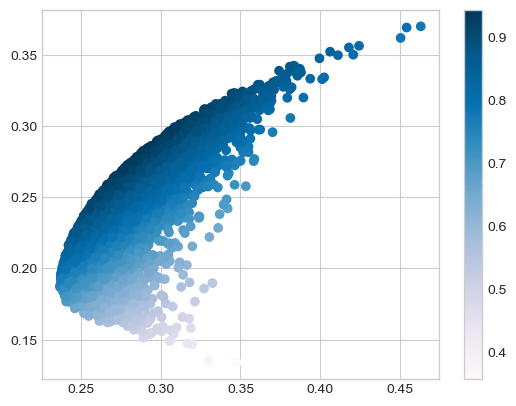

In [32]:
tickers = 'GOOG META MSFT AAPL TSLA'.split()
port_wts, port_risks, port_ann_rets, port_sharpe_rts = monte_carlo_sim(tickers, rfr=.01, n_sims=10000, start='2010-01-01', end=None)

plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')
plt.colorbar()

plt.show()

&nbsp;

&nbsp;

---

### Highlighting the max sharpe ratio portfolio

We also want to highlight the max sharpe portfolio, which is the portfolio with the highest sharpe ratio. We thus need to find the portfolio risk and annualized return for the portfolio with the highest sharpe ratio. For this, we can use the `.argmax()` method, which gives us the position of the highest value in an array.

Have a look at the example below. We create an array with the values 1, 3, 1, 0. 3 is the largest value and its position is 1 (remember that in Python we start counting positions from 0).

By using `.argmax()` on the array, we get the position of the largest value.

In [33]:
my_array = np.array([1, 3, 1, 0])

print(my_array.argmax())

1


We can use the `.argmax()` method on the **port_sharpe_rts** array to get the position of the portfolio with the highest sharpe ratio, which is 4751. From all 10000 simulated portfolios, the one at position 3875 has the highest sharpe ratio.

In [34]:
port_sharpe_rts.argmax()

4192

Let us store this value in a variable.

In [35]:
idx_max_sharpe = port_sharpe_rts.argmax()

We can get the annualized risk and return for the max sharpe portfolio using the `port_sharpe_rts.argmax()` inside the square brackets to select the port_risk for the portfolio at position 2914.

In [36]:
print(port_risks[idx_max_sharpe])
print(port_ann_rets[idx_max_sharpe])

0.2888288704607021
0.28264279416663296


We store the values in two values (line 1+2) and use them to plot a single red dot for the max sharpe portfolio (line 7).

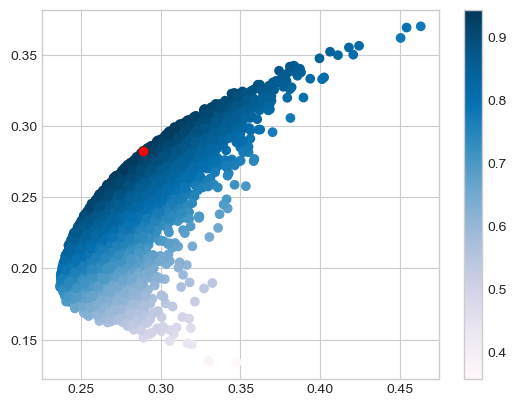

In [37]:
max_sharpe_x = port_risks[idx_max_sharpe]
max_sharpe_y = port_ann_rets[idx_max_sharpe]

plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')
plt.colorbar()

plt.scatter(max_sharpe_x, max_sharpe_y, color='red')

plt.show()

### Task 5 - Highlighting max sharpe portfolio

1. Create variables for the max sharpe portfolio risk and return
2. Use the variables to plot single dot for the max sharpe portfolio.

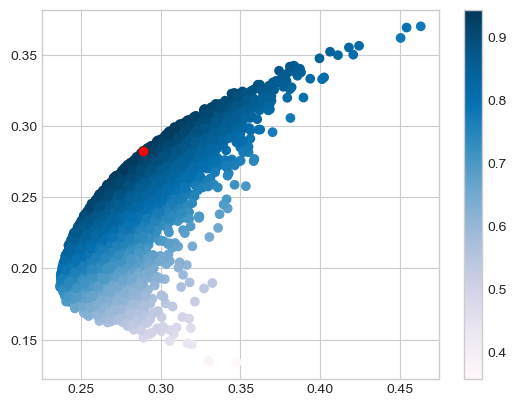

In [38]:
idx_max_sharpe = port_sharpe_rts.argmax()

max_sharpe_x = port_risks[idx_max_sharpe]
max_sharpe_y = port_ann_rets[idx_max_sharpe]

plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')
plt.colorbar()

plt.scatter(max_sharpe_x, max_sharpe_y, c='red')

plt.show()

&nbsp;

### Bonus task 1 - Comparing portfolio weights

1. Store the weights for the min variance, max return and max sharpe ratio portfolios using the `.argmax()` method in three separate variables.
2. Create a figure with three axes objects next to each other.
3. Generate three bar plots as below for the min variance, max return and max sharpe ratio portfolio.
4. Add titles to each bar plot
5. Use the colors from the tab20 colormap for the bars.

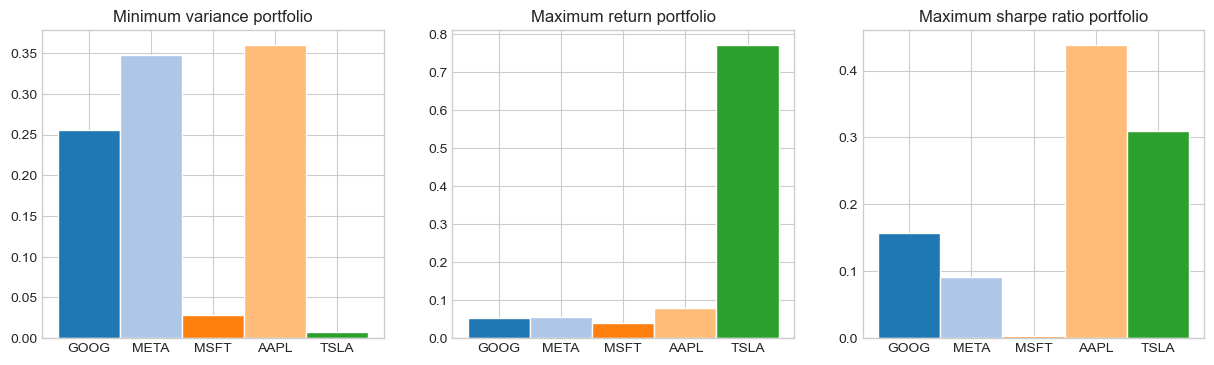

In [42]:
# calculating the weights for the min var, max return and max sharpe portfolio
min_var_wts = port_wts[port_risks.argmin()]
max_ret_wts = port_wts[port_ann_rets.argmax()]
max_sharpe_wts = port_wts[port_sharpe_rts.argmax()]

# using the color codes from tab20 colormap
colors = plt.get_cmap('tab20').colors

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.bar(x=tickers, height=min_var_wts, color=colors, width=1, edgecolor='white')
ax1.set_title('Minimum variance portfolio')

ax2.bar(x=tickers, height=max_ret_wts, color=colors, width=1, edgecolor='white')
ax2.set_title('Maximum return portfolio')

ax3.bar(x=tickers, height=max_sharpe_wts, color=colors, width=1, edgecolor='white')
ax3.set_title('Maximum sharpe ratio portfolio')

plt.show()


&nbsp;

&nbsp;

### Final task - Please give us your feedback!

In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack. We would be grateful if you could take a moment before the end of the workshop to get your feedback!

[Click here to open the survey!](https://lse.eu.qualtrics.com/jfe/form/SV_eflc2yj4pcryc62?coursename=Python%for%Finance&topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/EYPJmCzFN9RLv2fpK8cjtKkBva_-Jt-g6UFvDz_Mm1B3Bg&prog=DS&version=21-22&link2=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/Ed8x3ZOIks1Pnv7hFiSg2mkBst_V_f-WS6d2RBTKjCIVeA)

&nbsp;

&nbsp;

## Appendix

### A - Combining scatter and bar plots in one chart

See below for a function that lets you plot the results of a monte carlo simulation in a single chart.

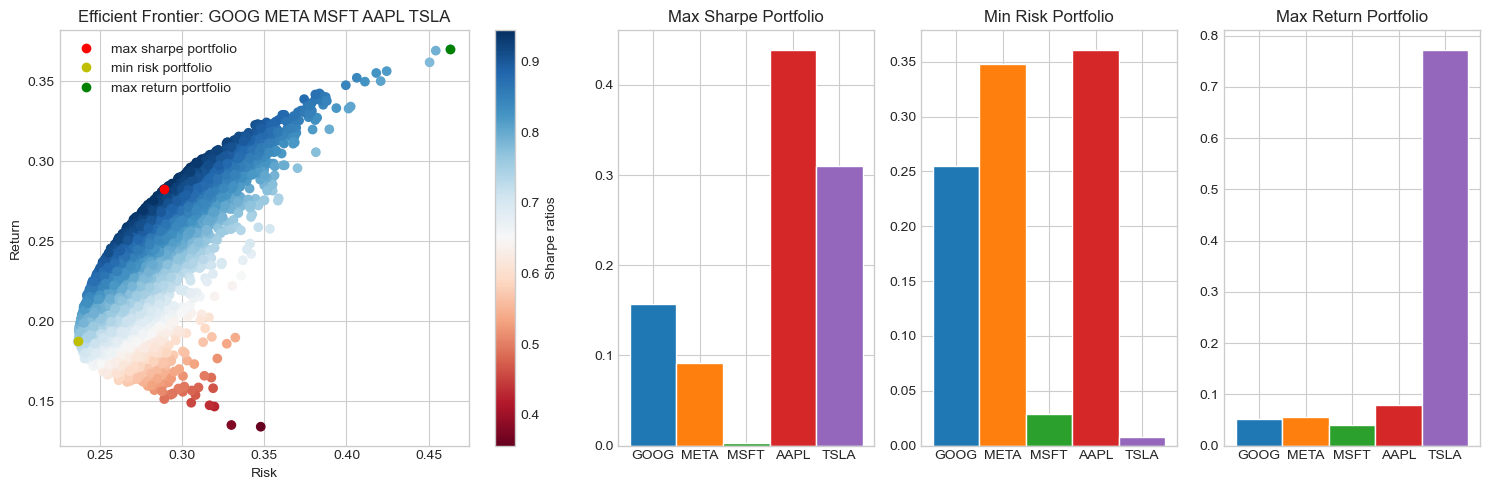

In [44]:
def po_plot(port_wts, port_sds, port_ann_rets, port_sharpe_rts, tickers):
    fig, axs = plt.subplots(1, 4, figsize=(15,5), gridspec_kw={'width_ratios': [2, 1, 1, 1]})

    scatter = axs[0].scatter(x=port_sds, y=port_ann_rets, c=port_sharpe_rts, cmap='RdBu')
    axs[0].plot(port_sds[port_sharpe_rts.argmax()], port_ann_rets[port_sharpe_rts.argmax()], 'ro', label='max sharpe portfolio')
    axs[0].plot(port_sds[port_sds.argmin()], port_ann_rets[port_sds.argmin()], 'yo', label='min risk portfolio')
    axs[0].plot(port_sds[port_ann_rets.argmax()], port_ann_rets[port_ann_rets.argmax()], 'go', label='max return portfolio')

    cbar = plt.colorbar(scatter, ax=axs[0])
    cbar.set_label('Sharpe ratios')

    axs[0].set_title(f'Efficient Frontier: {" ".join(tickers)}')
    axs[0].set_xlabel('Risk')
    axs[0].set_ylabel('Return')

    axs[1].bar(x=tickers, height=port_wts[port_sharpe_rts.argmax()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[1].set_title('Max Sharpe Portfolio')
    axs[2].bar(x=tickers, height=port_wts[port_sds.argmin()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[2].set_title('Min Risk Portfolio')
    axs[3].bar(x=tickers, height=port_wts[port_ann_rets.argmax()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[3].set_title('Max Return Portfolio')

    axs[0].legend()
    plt.tight_layout()
    plt.show()
    
po_plot(port_wts, port_risks, port_ann_rets, port_sharpe_rts, tickers)

### 

### B - Max sharpe portfolio with pypfopt library

With pypfopt you can do portfolio optimization in Python more conveniently. The library provides functions to calculate the efficient frontier using optimization algorithms, which creates the output much faster than using a simulation. It also features functions to calcualte the asset allocation given a certain investment.

The installation via conda is not currently supported but you can install it through pip, the general Python package management system. To install PyPortfolioOpt we also have to install a package CMake using the same command

In [63]:
pip install PyPortfolioOpt

Below is an example of how you can initiate the efficient frontier using the annualized returns for each stock and the annualized covariance matrix.

In [45]:
import yfinance as yf
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier

tickers = 'AMZN NFLX MSFT META GOOG'.split()
stock_prices = yf.download(tickers, start='2000-01-01')['Adj Close']
stock_prices = stock_prices.dropna()

# calculate annualized return
mu = expected_returns.mean_historical_return(stock_prices)

# calculate annualized covariance matrix
S = risk_models.sample_cov(stock_prices)

# initiate efficient frontier
ef = EfficientFrontier(mu, S)

[*********************100%***********************]  5 of 5 completed


Once the efficient frontier has been intiated, you can calculate the maximum sharpe ratio given a risk-free rate. The `.max_sharpe()` function returns the weights for the max sharpe portfolio.

In [46]:
# solve for maximum sharpe ratio
ef.max_sharpe(risk_free_rate=.02)

OrderedDict([('AMZN', 0.0365321892709142),
             ('GOOG', 0.0),
             ('META', 0.0),
             ('MSFT', 0.6562824861299394),
             ('NFLX', 0.3071853245991464)])

We can get the expected annual return, risk and sharpe ratio with `ef.portfolio_performance(verbose=True)`

In [47]:
ef.portfolio_performance(verbose=True)

Expected annual return: 29.1%
Annual volatility: 27.9%
Sharpe Ratio: 0.97


(0.2910556548463006, 0.27939426013178653, 0.9701547008104148)

The CLA (critical line algorithm) enables us to calculate the values of efficient frontier. Similar to the `EfficientFrontier` class, it requires the annualized stock returns and the annualized covariance matrix. 

The efficient frontier values can be visualized with the `plot_efficient_frontier()` function from the plotting module.

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

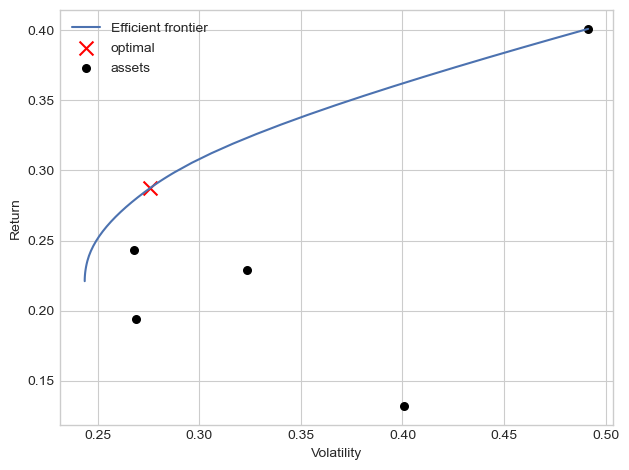

In [48]:
from pypfopt import CLA
from pypfopt import plotting

cla = CLA(mu, S)

plotting.plot_efficient_frontier(cla)

We can retrieve the values from the efficient frontier with the `frontier_values` attribute of the `cla` object.

The first array contains the returns. The second one contains the portfolio standard deviations.

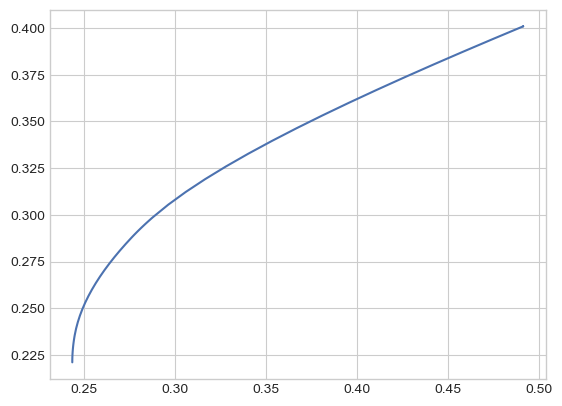

In [49]:
ef_risks = np.array(sorted(cla.frontier_values[1]))
ef_rets = np.array(sorted(cla.frontier_values[0]))

plt.plot(ef_risks, ef_rets)

Now we can get the optimal return for a given level of risk or vice versa.

In [50]:
max_risk = .40
optimal_ret = ef_rets[ef_risks > max_risk][0]

print(f'Optimal return for max risk of {max_risk}: {round(optimal_ret, 2)}')

Optimal return for max risk of 0.4: 0.37


For more information on the pypfopt library, check out their [website](https://pypi.org/project/pyportfolioopt/), which also has a series of jupyter notebooks with portfolio optimization recipes hosted on [mybinder](https://github.com/robertmartin8/PyPortfolioOpt/tree/master/cookbook).

---

### C - Calculating portfolio standard deviation using the covariance matrix

The standard deviation of the portfolio returns can also be calculated using the covariance matrix. Below is an exmaple for a portfolio with two stocks.

$$\sigma_P^2 = w_1^2  \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \sigma_{1,2}$$

where
- $\sigma_P^2 = $ the portfolio variance
- $\sigma_1 = $ the variance of stock 1
- $\sigma_2 = $ the variance of stock 2
- $w_{1} = $ the weight of stock 1
- $w_{2} = $ the weight of stock 2
- $\sigma_{1,2} = $ the covariance between stock 1 and stock 2


This formula can be simplified by using the covariance matrix and calculating the dot product of the covariance matrix and  weights vector as below.

$$ \sigma_P^2 = \begin{bmatrix} w_{1} & w_{2} \end{bmatrix} \begin{bmatrix} \sigma_1^2 & \sigma_{1,2}  \\ \sigma_{2,1} & \sigma_2^2 \end{bmatrix}  \begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}  $$

The portfolio risk formula indicates that it is dependent on the variance of the individual stocks and the relationship between the stocks. How it compares to the simple weighted average of the individual stock variances will depend on the strength of the relationship between the stocks. Since stocks are usually correlated the portfolio variance is almost always substantially larger than the simple weighted average of the stock variances.

Below is the formula for a portfolio with three stocks. The portfolio variance is calculate by taking the weighted average of the three individual stock variances (the first three terms) and a further adjustment based on the covariance of the three stocks (last term).

$$ \sigma_P^2 = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} 
\begin{bmatrix}\sigma^2_{1} & \sigma_{1,2} & \sigma_{1,3} \\
\sigma_{2,1} & \sigma^2_{2} & \sigma_{2,3} \\
\sigma_{3,1} & \sigma_{3,2} & \sigma^2_{3} 
\end{bmatrix} 
\begin{bmatrix} w_1 \\ w_2 \\w_3 \end{bmatrix} $$

$$ \sigma_P^2 =  w_1^2\sigma^2_{1, 1} + w_2^2\sigma^2_{2, 2} + w_3^2\sigma^2_{3, 3} + 2w_1w_2\sigma^2_{1, 2} 2w_1w_3\sigma^2_{3, 1} 2w_2w_3\sigma^2_{3, 2}$$

#### Covariance matrix

We can calculate the covariance matrix with the .cov() method

In [51]:
cov_mat = stock_ret.cov()
cov_mat

,AMZN,GOOG,META
AMZN,0.000343,0.000222,0.000260
GOOG,0.000222,0.000346,0.000290
META,0.000260,0.000290,0.000496


Since the covariance is the average variance per trading day, we have to multiply the covariance matrix by 250, the average number of trading days in a year, to calculate the risk across the whole year. 

In [52]:
cov_mat *= 250
cov_mat

,AMZN,GOOG,META
AMZN,0.085755,0.055402,0.065037
GOOG,0.055402,0.086396,0.072408
META,0.065037,0.072408,0.124050


Now we can calculate the portfolio variance using the formula from above. We use the `.dot()` method to calculate the matrix products.

In [53]:
port_var = cov_mat.dot(weights).dot(weights.T)
print(port_var)

0.07249330027125546


We can also express the portfolio risk as the standard deviation by taking the square root of the variance. This is in the same units as the returns, which makes it easier to use.

In [54]:
port_sd = np.sqrt(port_var)
print('The portfolio standard deviation is:', port_sd)

The portfolio standard deviation is: 0.2692457989853425
